In [5]:
#### Problem statement 1: NLP

text = 'Deep learning!!! is the branch of machine learning, which is based on artificial neural network architecture, which makes it capable of learning complex patterns and relationships within data. An artificial neural network i.e. ANN uses layers of interconnected nodes called neurons that work togeather to process and learn from the input data. In a fully connected Deep neural network, there is an input layer and one or more hidden layers connected one after the other. Each neuron receives input from the previous layer neurons or the input layer. The output of one neuron becomes the input to other neurons in the next layer of the network, and this process continues until the final layer produces the output of the network. The number of layers will be 5. 1st layer is input layer and 5th layer is output layer'

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

## use tokenizer to split the sentences into tokens and removing punctuations and special characters
tk = RegexpTokenizer(r'\w+')
wr_tk = tk.tokenize(text)
print('Wr_Tk: ',wr_tk)

### Removing stopwords 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

tok = []
for t in wr_tk:
    if t not in stop_words:
        tok.append(t)
print('Tok: ', tok)



Wr_Tk:  ['Deep', 'learning', 'is', 'the', 'branch', 'of', 'machine', 'learning', 'which', 'is', 'based', 'on', 'artificial', 'neural', 'network', 'architecture', 'which', 'makes', 'it', 'capable', 'of', 'learning', 'complex', 'patterns', 'and', 'relationships', 'within', 'data', 'An', 'artificial', 'neural', 'network', 'i', 'e', 'ANN', 'uses', 'layers', 'of', 'interconnected', 'nodes', 'called', 'neurons', 'that', 'work', 'togeather', 'to', 'process', 'and', 'learn', 'from', 'the', 'input', 'data', 'In', 'a', 'fully', 'connected', 'Deep', 'neural', 'network', 'there', 'is', 'an', 'input', 'layer', 'and', 'one', 'or', 'more', 'hidden', 'layers', 'connected', 'one', 'after', 'the', 'other', 'Each', 'neuron', 'receives', 'input', 'from', 'the', 'previous', 'layer', 'neurons', 'or', 'the', 'input', 'layer', 'The', 'output', 'of', 'one', 'neuron', 'becomes', 'the', 'input', 'to', 'other', 'neurons', 'in', 'the', 'next', 'layer', 'of', 'the', 'network', 'and', 'this', 'process', 'continues',

In [ ]:
### problem statement 4 - Data Analysis

In [12]:
### problem statement 4 - Data Analysis

import pandas as pd

df = pd.read_csv('E:\car_data.csv')
df.head(5)

### To Find if there is any missing values present in data
print(df.isnull().sum())


Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64


In [14]:
## Price is our Target Variable. Based on variables like Make,Model, number of cylinder etc , price is determined.

az = df.copy(deep = True)

### Finding Number of unique values present in each columns
az.nunique()

Price       798
Mileage     791
Make          6
Model        32
Trim         47
Type          5
Cylinder      3
Liter        16
Doors         2
Cruise        2
Sound         2
Leather       2
dtype: int64

In [16]:
## Encode Variables like Make, Model, Trim, Type to use it for analysis.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
az['Make'] = le.fit_transform(az['Make'])
az['Model'] = le.fit_transform(az['Model'])
az['Trim'] = le.fit_transform(az['Trim'])
az['Type'] = le.fit_transform(az['Type'])


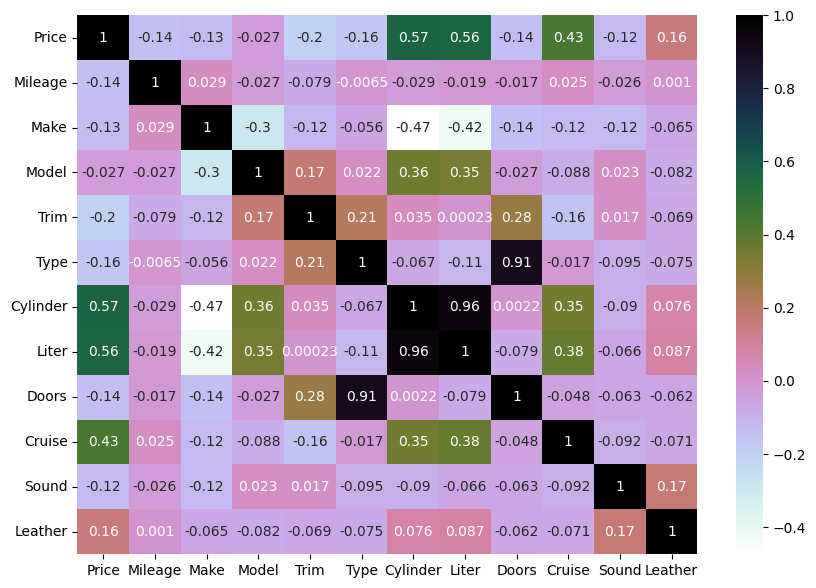

In [17]:
## Displaying Correlation values as Heatmap 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(az.corr(),annot=True,cmap='cubehelix_r')
plt.show() 

In [20]:
cor = az.corr()
cor_target = abs(cor["Price"])

#Selecting highly correlated features

relevant_features = cor_target[cor_target > 0.15]
print(relevant_features)     

Price       1.000000
Trim        0.203280
Type        0.163871
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Name: Price, dtype: float64


In [ ]:
## From heatmap and correlation values, we find that varibles like Cylinder, Liter, Cruise, Leather,Trim,Type have more correlation with Price(Target Variable)
## The above mentioned variables influence the Price more than the other variables

In [ ]:
##  Problem Statement 5: - API Integration

In [47]:
import requests

## I have taken weather report website for fetching data
api_key = "1c93d3f9b48cf03398223cccde287937"
city = input()
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"

response = requests.get(url)
data = response.json()

print('City: ', city)
print(data)

City:  London
{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 14.32, 'feels_like': 14.18, 'temp_min': 13.58, 'temp_max': 15.2, 'pressure': 1014, 'humidity': 91, 'sea_level': 1014, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 3.09, 'deg': 340}, 'rain': {'1h': 0.21}, 'clouds': {'all': 100}, 'dt': 1725521314, 'sys': {'type': 2, 'id': 268730, 'country': 'GB', 'sunrise': 1725513608, 'sunset': 1725561509}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


In [50]:
## Processing the weather data to give info in user-friendly format

weather = data['weather'][0]['description'].capitalize()
temperature = data['main']['temp']
Max_temp_of_day = data['main']['temp_max']
Min_temp_of_day = data['main']['temp_min']
humidity = data['main']['humidity']

print('Weather for Today: ', weather)
print('Temperature(in celsius): ',temperature)
print('Max Temp today(in celsius): ',Max_temp_of_day)
print('Min Temp today(in celsius): ',Min_temp_of_day)
print('Humidity: ',humidity)


Weather for Today:  Light rain
Temperature(in celsius):  14.32
Max Temp today(in celsius):  15.2
Min Temp today(in celsius):  13.58
Humidity:  91


In [ ]:
## Problem statement 2: Text Generation


In [1]:

import transformers
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = "gpt2-medium" 
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\User\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [3]:
def generate_text(text, max_length=150):
    # Encode the input prompt
    input_ids = tokenizer.encode(text, return_tensors='pt')
    
    
    # Create attention mask
    attention_mask = torch.ones(input_ids.shape, dtype=torch.long)
    
    # Generate text
    output = model.generate(
        input_ids,
        attention_mask=attention_mask,  
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        top_p=0.95,
        temperature=0.7,
        pad_token_id=tokenizer.eos_token_id  
    )
    
    # Decode the generated text
    generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
    
    return generated_text

# Example usage
sent = "The rapid technology growth in"
generated_text = generate_text(sent)
print(generated_text)

The rapid technology growth in the last decade has led to a rapid increase in demand for energy. The demand is growing at a rate of about 1.5% per year.

The demand growth is driven by the rapid growth of the energy sector. In the past decade, the demand has grown by about 2.2% a year, and the growth rate is expected to continue to increase. This is due to the fact that the number of energy-related jobs has increased by more than 10% in just the first five years of this decade. As a result, there are more people working in energy than in any other sector of our economy.


In [4]:
## Evaluate generated text using perplexity

## Perplexity is calculated by exponentiating the loss. It gives a measure of how well the model predicts the text;
##Low Perplexity: Indicates model is confident in its predictions and the text is likely coherent and well-formed.
##High Perplexity: Indicates model struggled to predict the sequence, which suggest that text is less coherent or not formed correctly.

def calculate_perplexity(text):
    input_ids = tokenizer.encode(text, return_tensors='pt')

    attention_mask = torch.ones(input_ids.shape, dtype=torch.long)
    with torch.no_grad():
        output = model(input_ids, labels=input_ids, attention_mask=attention_mask)
        loss = output.loss

    perplexity = torch.exp(loss).item()
    return perplexity

# Calculate perplexity for the generated text
perplexity = calculate_perplexity(generated_text)
print(f"Perplexity: {perplexity}")

Perplexity: 5.131004810333252


In [ ]:
## The perplexity Score of less than 10 is considered that the model is very good.